In [98]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('final_data.csv')
pd.set_option('display.max_rows', 1000)

Breakdown of the types of websites we have used

<AxesSubplot:ylabel='None'>

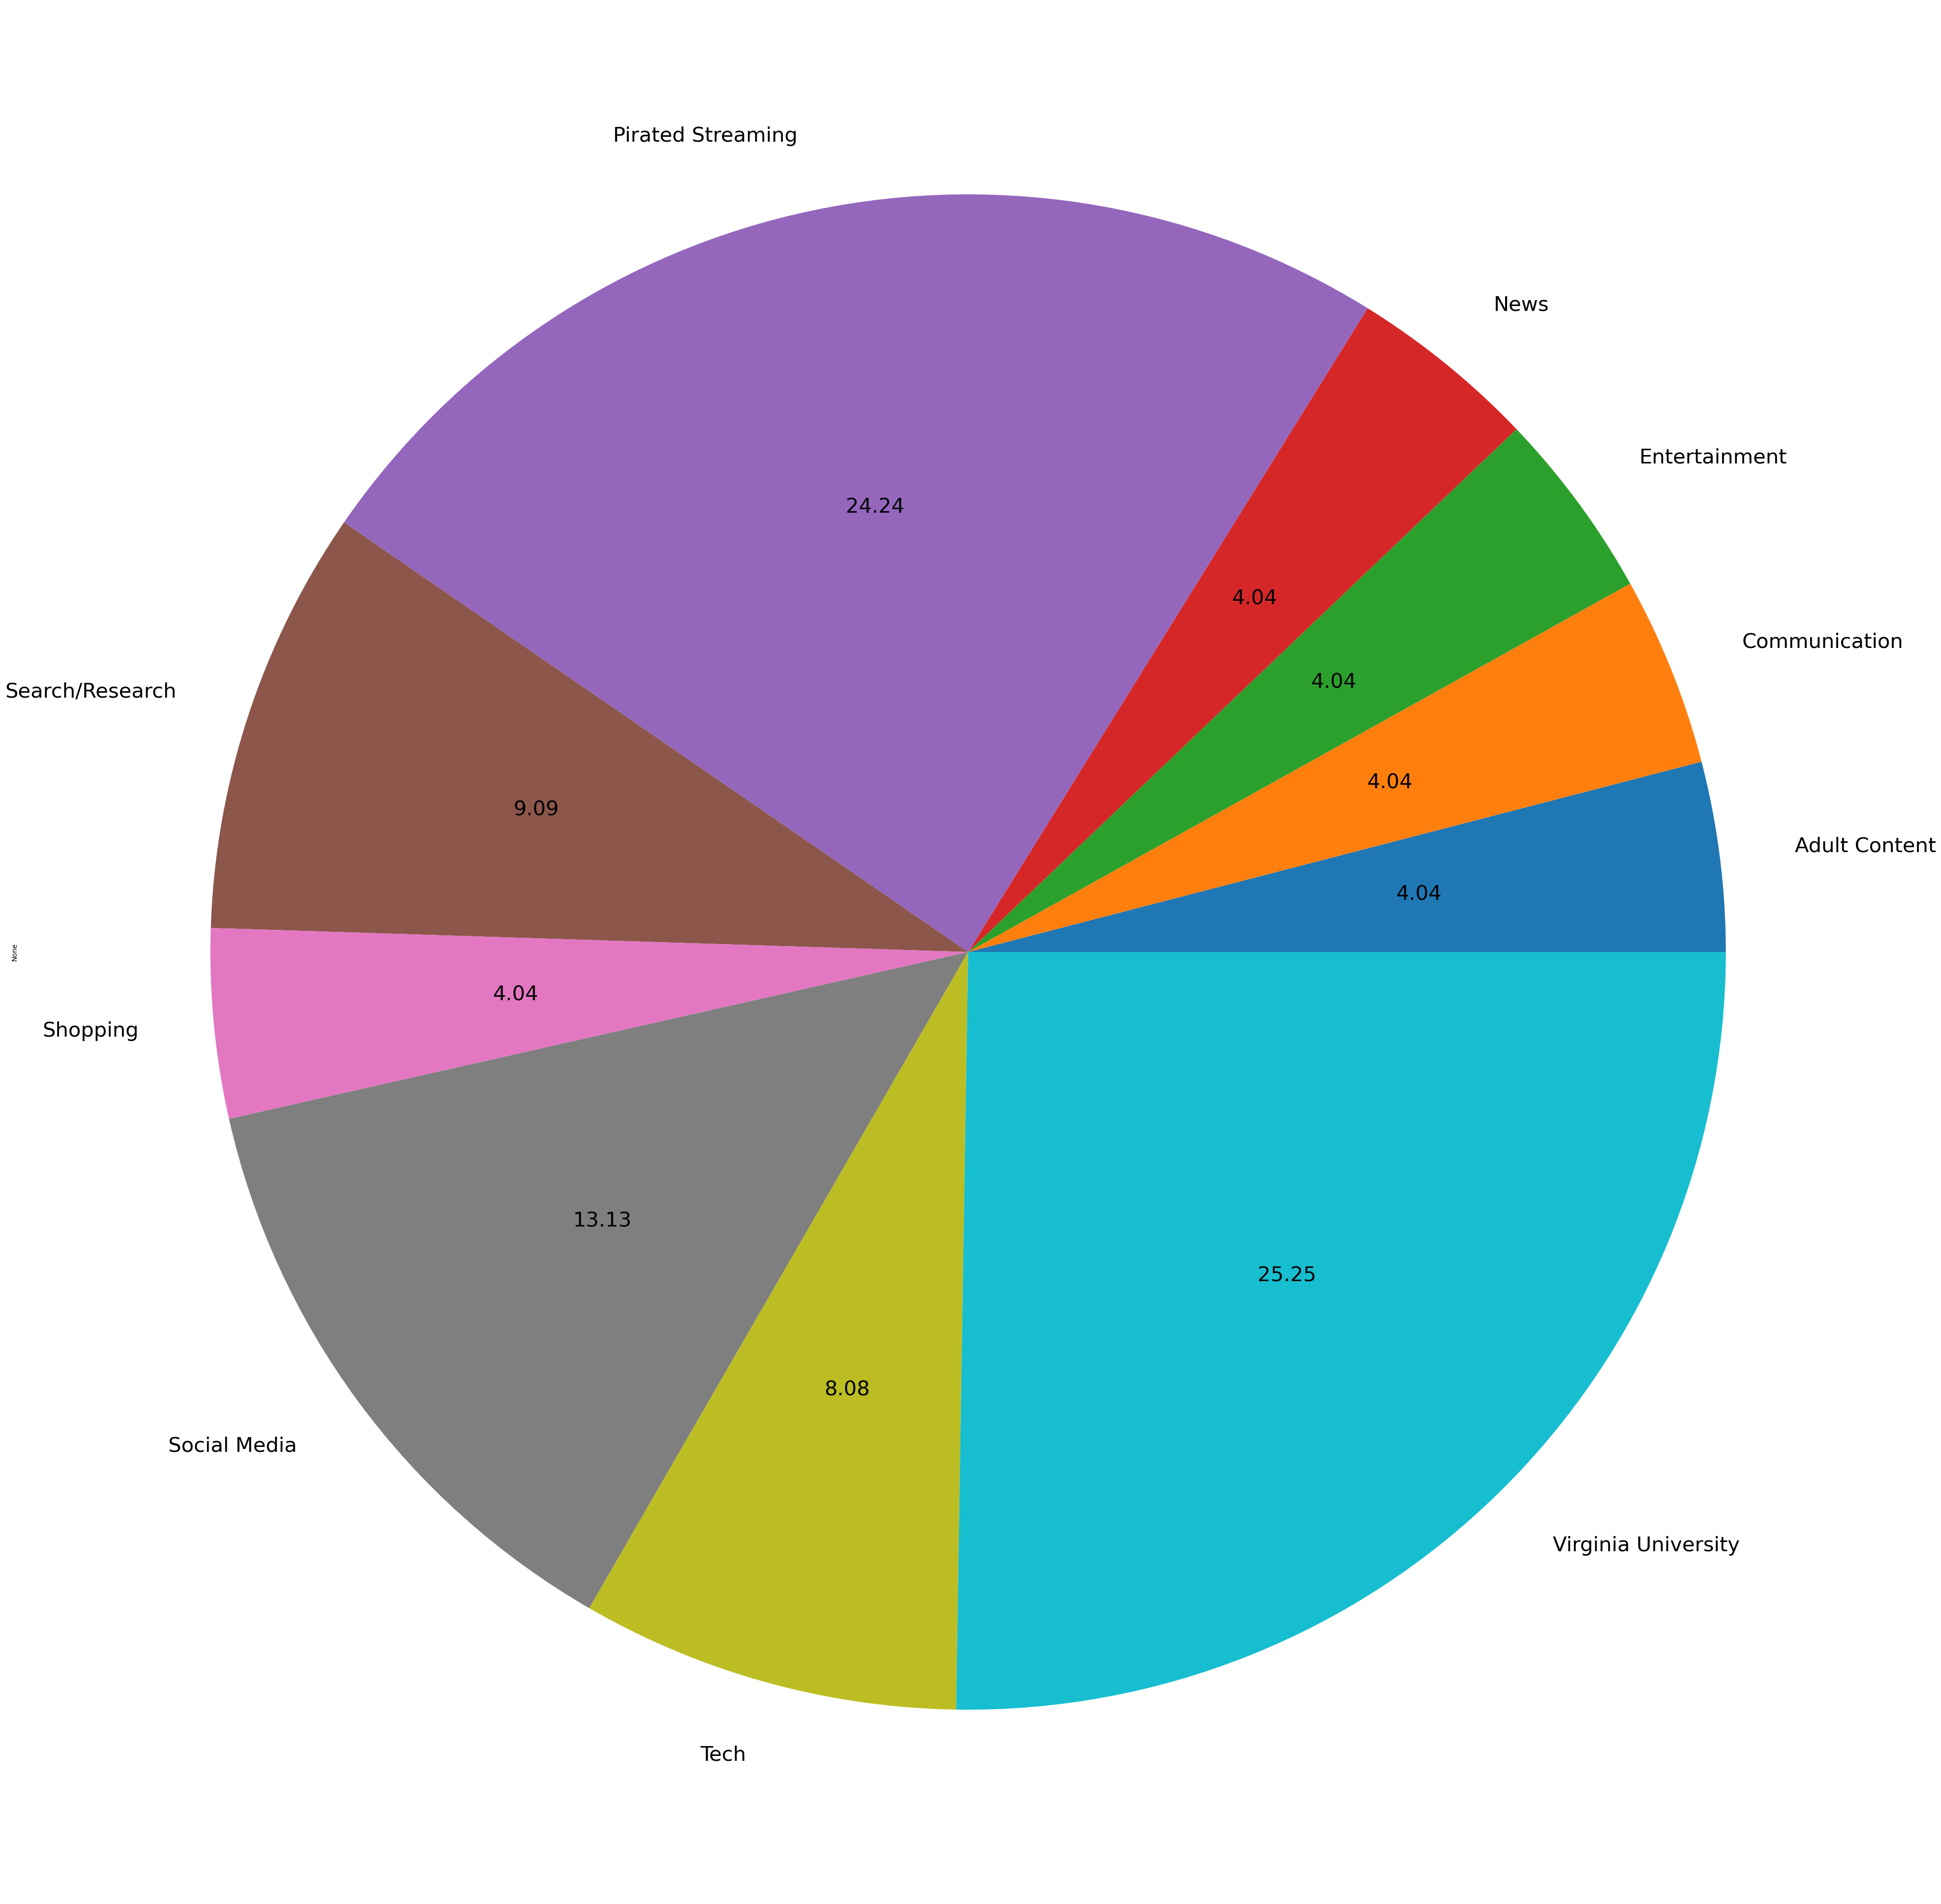

In [99]:
df.groupby('Category').size().plot(kind='pie', autopct='%.2f', figsize = (50,50), fontsize = 30)

NA Counts

In [100]:
df.isna().sum()

Domain Name                0
Category                   0
Third Party Requests       0
Ad Counts                  0
First Party Cookies       21
Third Party Cookies       21
Tracking Pixels            6
Ad Trackers                6
Fingerprint Indicators     6
dtype: int64

Text(0.5, 1.0, 'Histogram of Third Party Requests')

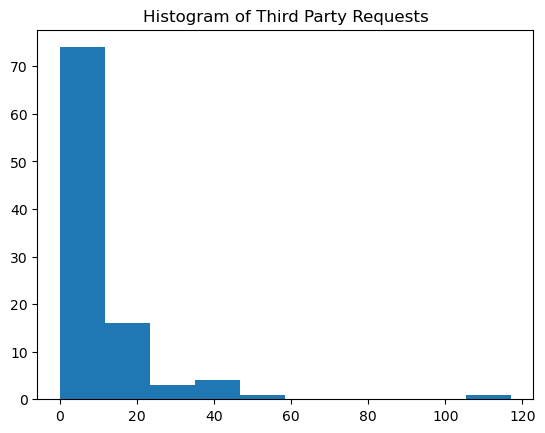

In [101]:
plt.hist(df['Third Party Requests'])
plt.title('Histogram of Third Party Requests')

In [102]:
df['Third Party Requests'].describe()

count     99.000000
mean      10.989899
std       14.727106
min        0.000000
25%        3.500000
50%        7.000000
75%       11.500000
max      117.000000
Name: Third Party Requests, dtype: float64

Text(0.5, 1.0, 'Histogram of Ad Counts')

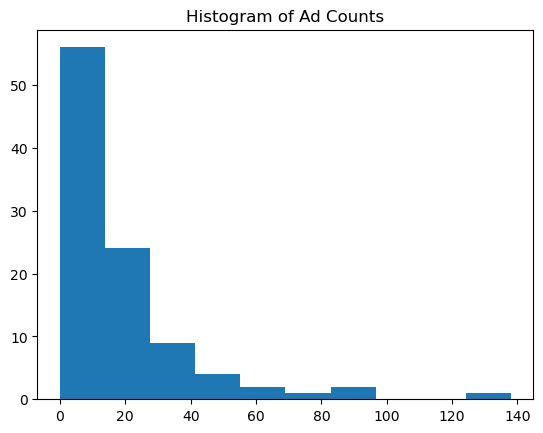

In [103]:
plt.hist(df['Ad Counts'])
plt.title('Histogram of Ad Counts')

Text(0.5, 1.0, 'Histogram of First Party Cookies')

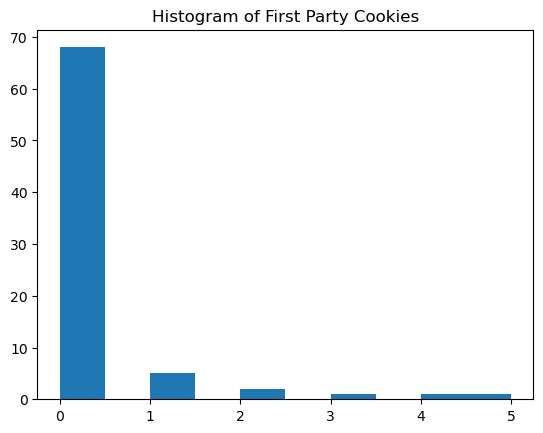

In [104]:
plt.hist(df['First Party Cookies'])
plt.title('Histogram of First Party Cookies')

In [105]:
df['First Party Cookies'].describe()

count    78.000000
mean      0.269231
std       0.862992
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       5.000000
Name: First Party Cookies, dtype: float64

Text(0.5, 1.0, 'Histogram of Third Party Cookies')

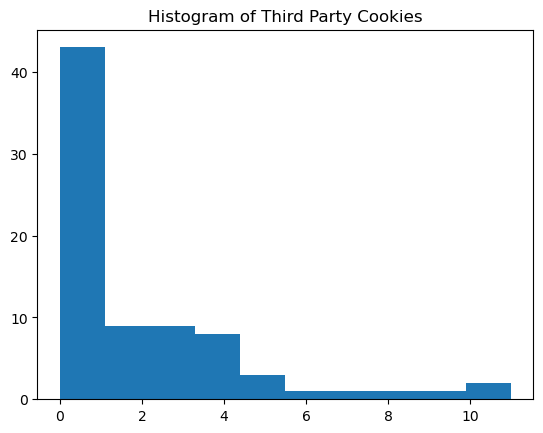

In [106]:
plt.hist(df['Third Party Cookies'])
plt.title('Histogram of Third Party Cookies')

In [107]:
df['Third Party Cookies'].describe()

count    78.000000
mean      1.923077
std       2.521437
min       0.000000
25%       0.000000
50%       1.000000
75%       3.000000
max      11.000000
Name: Third Party Cookies, dtype: float64

Text(0.5, 1.0, 'Histogram of Tracking Pixels')

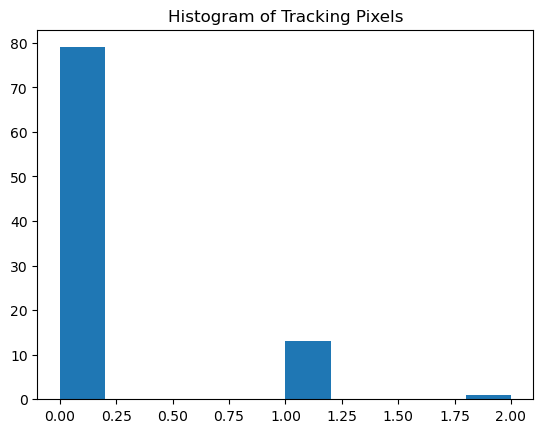

In [108]:
plt.hist(df['Tracking Pixels'])
plt.title('Histogram of Tracking Pixels')

In [109]:
df['Tracking Pixels'].describe()

count    93.000000
mean      0.161290
std       0.398102
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: Tracking Pixels, dtype: float64

Text(0.5, 1.0, 'Histogram of Ad Trackers')

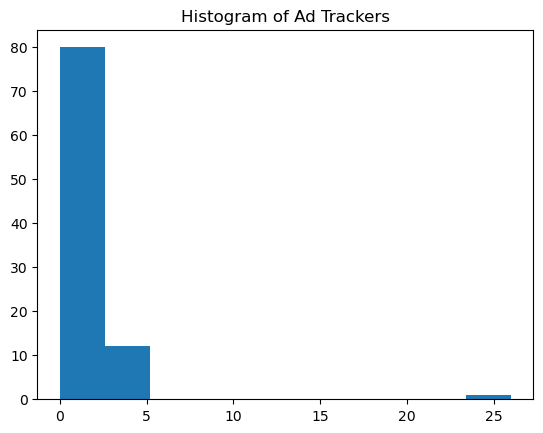

In [110]:
plt.hist(df['Ad Trackers'])
plt.title('Histogram of Ad Trackers')

In [111]:
df['Ad Trackers'].describe()

count    93.000000
mean      1.193548
std       2.859987
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max      26.000000
Name: Ad Trackers, dtype: float64

From here on I filled in all NAs with the average of the rest of the metric to make the analysis work

In [112]:
newdf = df

In [113]:
newdf['Third Party Requests'] = newdf['Third Party Requests'].fillna(newdf['Third Party Requests'].mean())
newdf['Ad Counts'] = newdf['Ad Counts'].fillna(newdf['Ad Counts'].mean())
newdf['First Party Cookies'] = newdf['First Party Cookies'].fillna(newdf['First Party Cookies'].mean())
newdf['Third Party Cookies'] = newdf['Third Party Cookies'].fillna(newdf['Third Party Cookies'].mean())
newdf['Tracking Pixels'] = newdf['Tracking Pixels'].fillna(newdf['Tracking Pixels'].mean())
newdf['Ad Trackers'] = newdf['Ad Trackers'].fillna(newdf['Ad Trackers'].mean())
newdf['Fingerprint Indicators'] = newdf['Fingerprint Indicators'].fillna('No')

In [114]:
newdf.isna().sum()

Domain Name               0
Category                  0
Third Party Requests      0
Ad Counts                 0
First Party Cookies       0
Third Party Cookies       0
Tracking Pixels           0
Ad Trackers               0
Fingerprint Indicators    0
dtype: int64

In [115]:
newdf = newdf.drop(['Fingerprint Indicators'], axis = 1)

In [116]:
newdf

,Domain Name,Category,Third Party Requests,Ad Counts,First Party Cookies,Third Party Cookies,Tracking Pixels,Ad Trackers
0,www.virginia.edu,Virginia University,37,0,0.000000,0.000000,1.00000,2.000000
1,www.cnu.edu,Virginia University,18,0,0.000000,0.000000,1.00000,1.000000
2,www.jmu.edu,Virginia University,8,0,0.000000,0.000000,0.00000,1.000000
3,www.longwood.edu,Virginia University,11,0,0.000000,0.000000,0.00000,0.000000
4,www.nsu.edu,Virginia University,21,0,4.000000,0.000000,0.00000,0.000000
5,www.odu.edu,Virginia University,9,0,0.000000,0.000000,0.00000,0.000000
6,www.radford.edu,Virginia University,11,0,1.000000,0.000000,0.00000,3.000000
7,www.uvawise.edu,Virginia University,5,0,0.000000,0.000000,0.00000,0.000000
8,www.vcu.edu,Virginia University,10,0,0.000000,0.000000,0.00000,0.000000
9,www.vmi.edu,Virginia University,10,0,0.000000,0.000000,0.00000,1.000000


In [117]:
print(newdf.groupby('Category').agg('mean'))

                     Third Party Requests  Ad Counts  First Party Cookies  \
Category                                                                    
Adult Content                    3.500000  15.750000             0.067308   
Communication                    8.250000  30.250000             0.250000   
Entertainment                   40.750000  41.750000             0.000000   
News                             6.500000  60.000000             0.000000   
Pirated Streaming                5.583333  13.250000             0.240385   
Search/Research                 10.888889  22.222222             0.333333   
Shopping                        13.750000  24.500000             0.000000   
Social Media                    12.076923  14.307692             0.139053   
Tech                             4.750000  29.625000             0.033654   
Virginia University             14.800000   0.000000             0.581538   

                     Third Party Cookies  Tracking Pixels  Ad Trackers  
Ca

In [118]:
groupeddf = newdf.groupby('Category').agg('mean')

In [119]:
groupeddf.reset_index(inplace = True)
groupeddf

,Category,Third Party Requests,Ad Counts,First Party Cookies,Third Party Cookies,Tracking Pixels,Ad Trackers
0,Adult Content,3.500000,15.750000,0.067308,1.980769,0.040323,0.798387
1,Communication,8.250000,30.250000,0.250000,3.250000,0.500000,1.250000
2,Entertainment,40.750000,41.750000,0.000000,1.500000,0.000000,8.250000
3,News,6.500000,60.000000,0.000000,3.250000,0.000000,1.750000
4,Pirated Streaming,5.583333,13.250000,0.240385,1.663462,0.180108,0.557796
5,Search/Research,10.888889,22.222222,0.333333,3.555556,0.017921,1.132616
6,Shopping,13.750000,24.500000,0.000000,5.000000,0.250000,1.000000
7,Social Media,12.076923,14.307692,0.139053,3.059172,0.076923,1.230769
8,Tech,4.750000,29.625000,0.033654,1.740385,0.000000,0.750000
9,Virginia University,14.800000,0.000000,0.581538,0.193846,0.292903,0.815484


In [120]:
groupeddf[['Category', 'Third Party Requests']].sort_values(by = ['Third Party Requests'], ascending = False)

,Category,Third Party Requests
2,Entertainment,40.750000
9,Virginia University,14.800000
6,Shopping,13.750000
7,Social Media,12.076923
5,Search/Research,10.888889
1,Communication,8.250000
3,News,6.500000
4,Pirated Streaming,5.583333
8,Tech,4.750000
0,Adult Content,3.500000


In [121]:
groupeddf[['Category', 'Ad Counts']].sort_values(by = ['Ad Counts'], ascending = False)

,Category,Ad Counts
3,News,60.000000
2,Entertainment,41.750000
1,Communication,30.250000
8,Tech,29.625000
6,Shopping,24.500000
5,Search/Research,22.222222
0,Adult Content,15.750000
7,Social Media,14.307692
4,Pirated Streaming,13.250000
9,Virginia University,0.000000


In [122]:
groupeddf[['Category', 'First Party Cookies']].sort_values(by = ['First Party Cookies'], ascending = False)

,Category,First Party Cookies
9,Virginia University,0.581538
5,Search/Research,0.333333
1,Communication,0.250000
4,Pirated Streaming,0.240385
7,Social Media,0.139053
0,Adult Content,0.067308
8,Tech,0.033654
2,Entertainment,0.000000
3,News,0.000000
6,Shopping,0.000000


In [123]:
groupeddf[['Category', 'Third Party Cookies']].sort_values(by = ['Third Party Cookies'], ascending = False)

,Category,Third Party Cookies
6,Shopping,5.000000
5,Search/Research,3.555556
1,Communication,3.250000
3,News,3.250000
7,Social Media,3.059172
0,Adult Content,1.980769
8,Tech,1.740385
4,Pirated Streaming,1.663462
2,Entertainment,1.500000
9,Virginia University,0.193846


In [124]:
groupeddf[['Category', 'Tracking Pixels']].sort_values(by = ['Tracking Pixels'], ascending = False)

,Category,Tracking Pixels
1,Communication,0.500000
9,Virginia University,0.292903
6,Shopping,0.250000
4,Pirated Streaming,0.180108
7,Social Media,0.076923
0,Adult Content,0.040323
5,Search/Research,0.017921
2,Entertainment,0.000000
3,News,0.000000
8,Tech,0.000000


In [125]:
groupeddf[['Category', 'Ad Trackers']].sort_values(by = ['Ad Trackers'], ascending = False)

,Category,Ad Trackers
2,Entertainment,8.250000
3,News,1.750000
1,Communication,1.250000
7,Social Media,1.230769
5,Search/Research,1.132616
6,Shopping,1.000000
9,Virginia University,0.815484
0,Adult Content,0.798387
8,Tech,0.750000
4,Pirated Streaming,0.557796


Text(0.5, 1.0, 'Average Third Party Requests by Category')

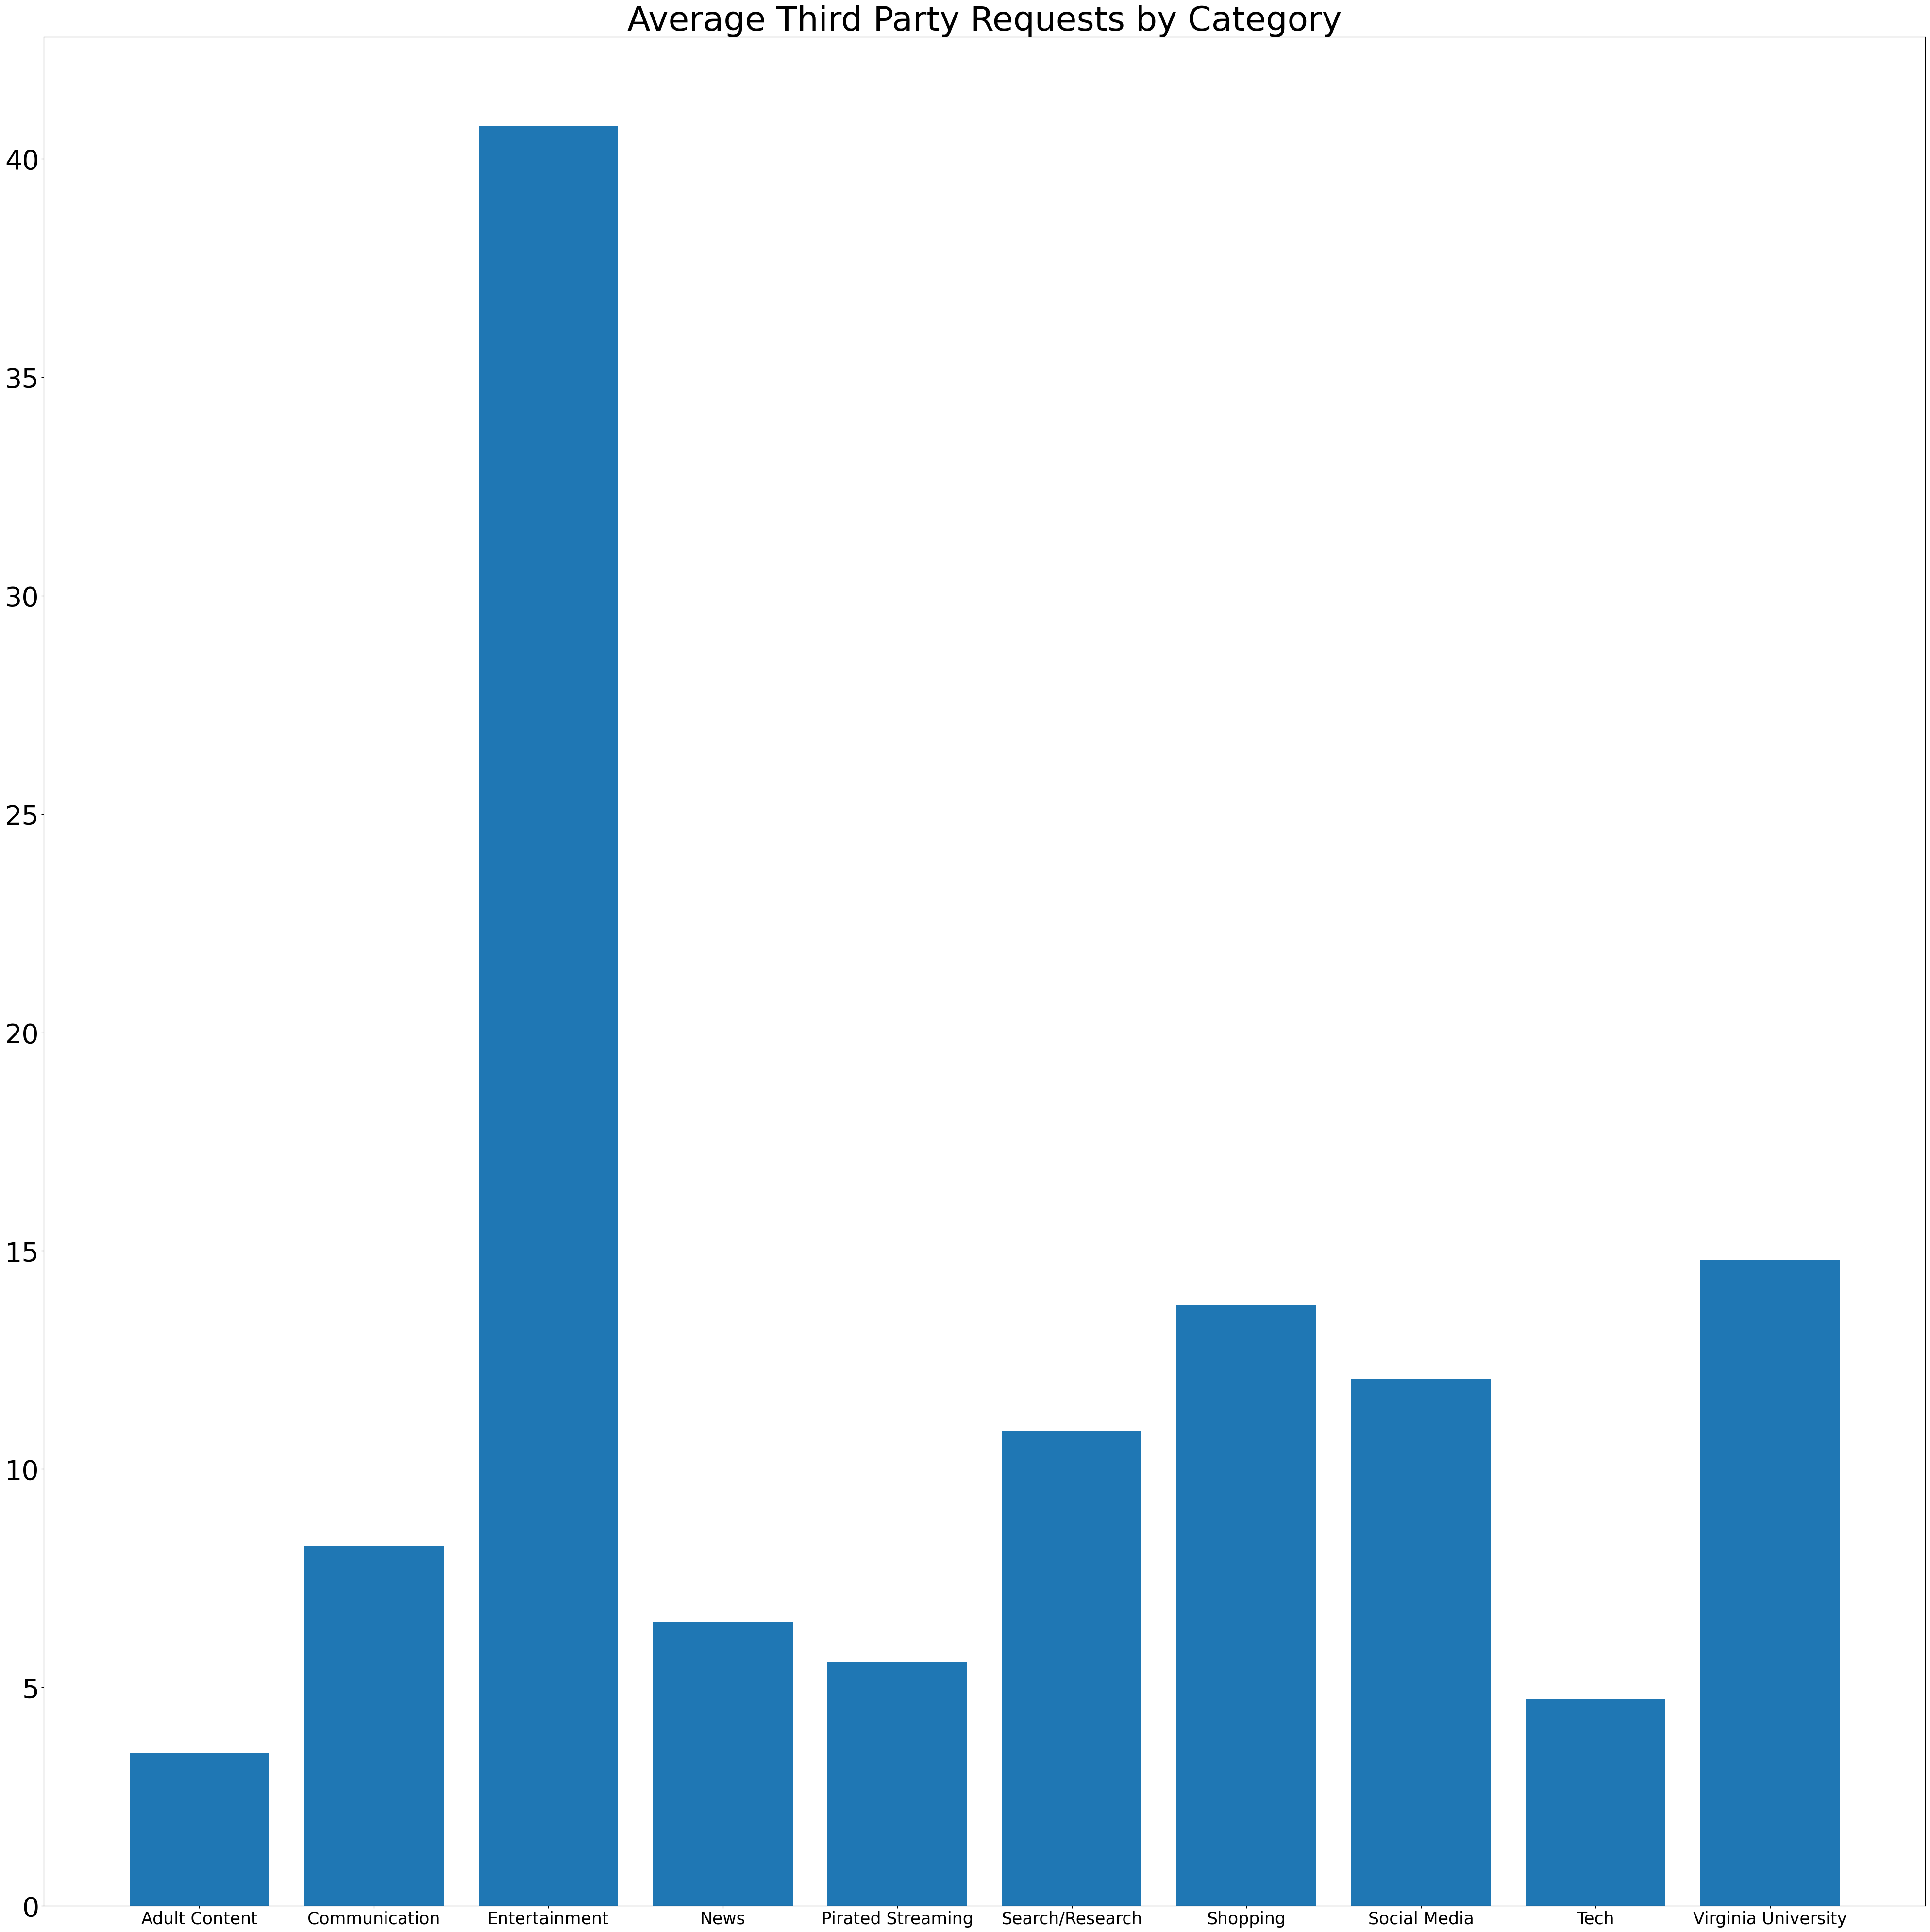

In [126]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Third Party Requests'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Third Party Requests by Category', fontsize = 50)

Text(0.5, 1.0, 'Average Ad Counts by Category')

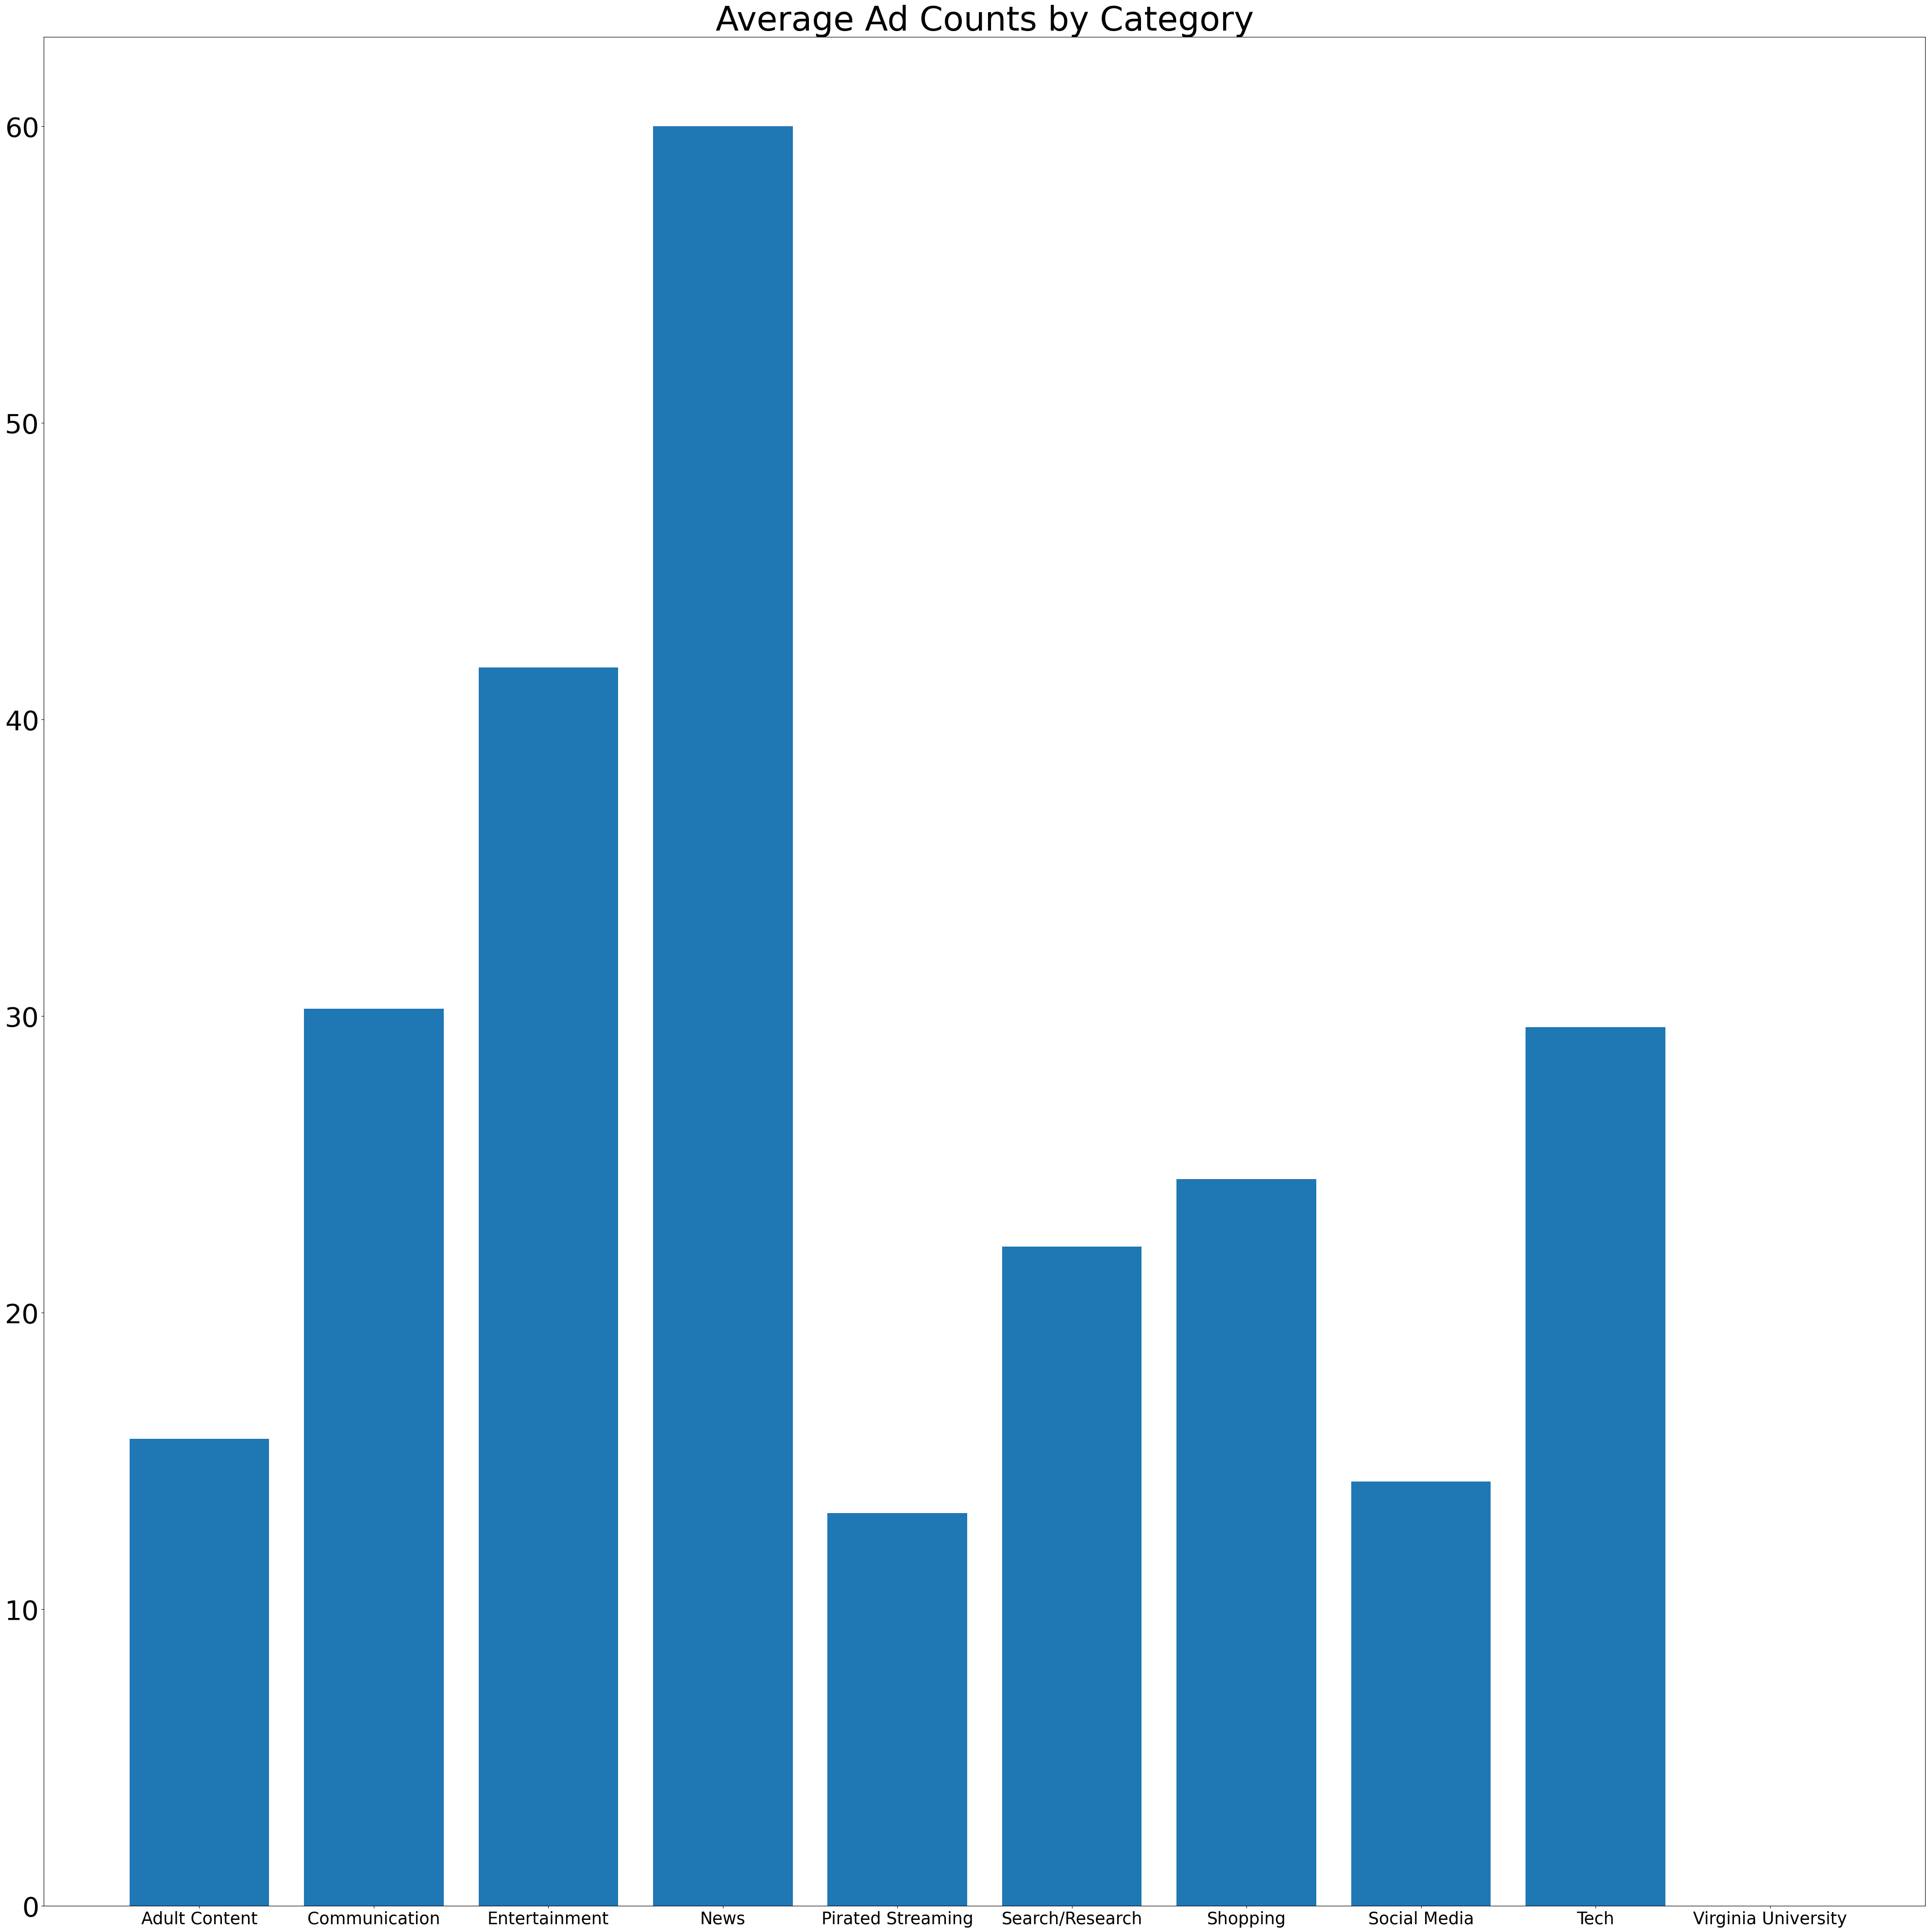

In [127]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Ad Counts'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Ad Counts by Category', fontsize = 50)

Text(0.5, 1.0, 'Average First Party Cookies by Category')

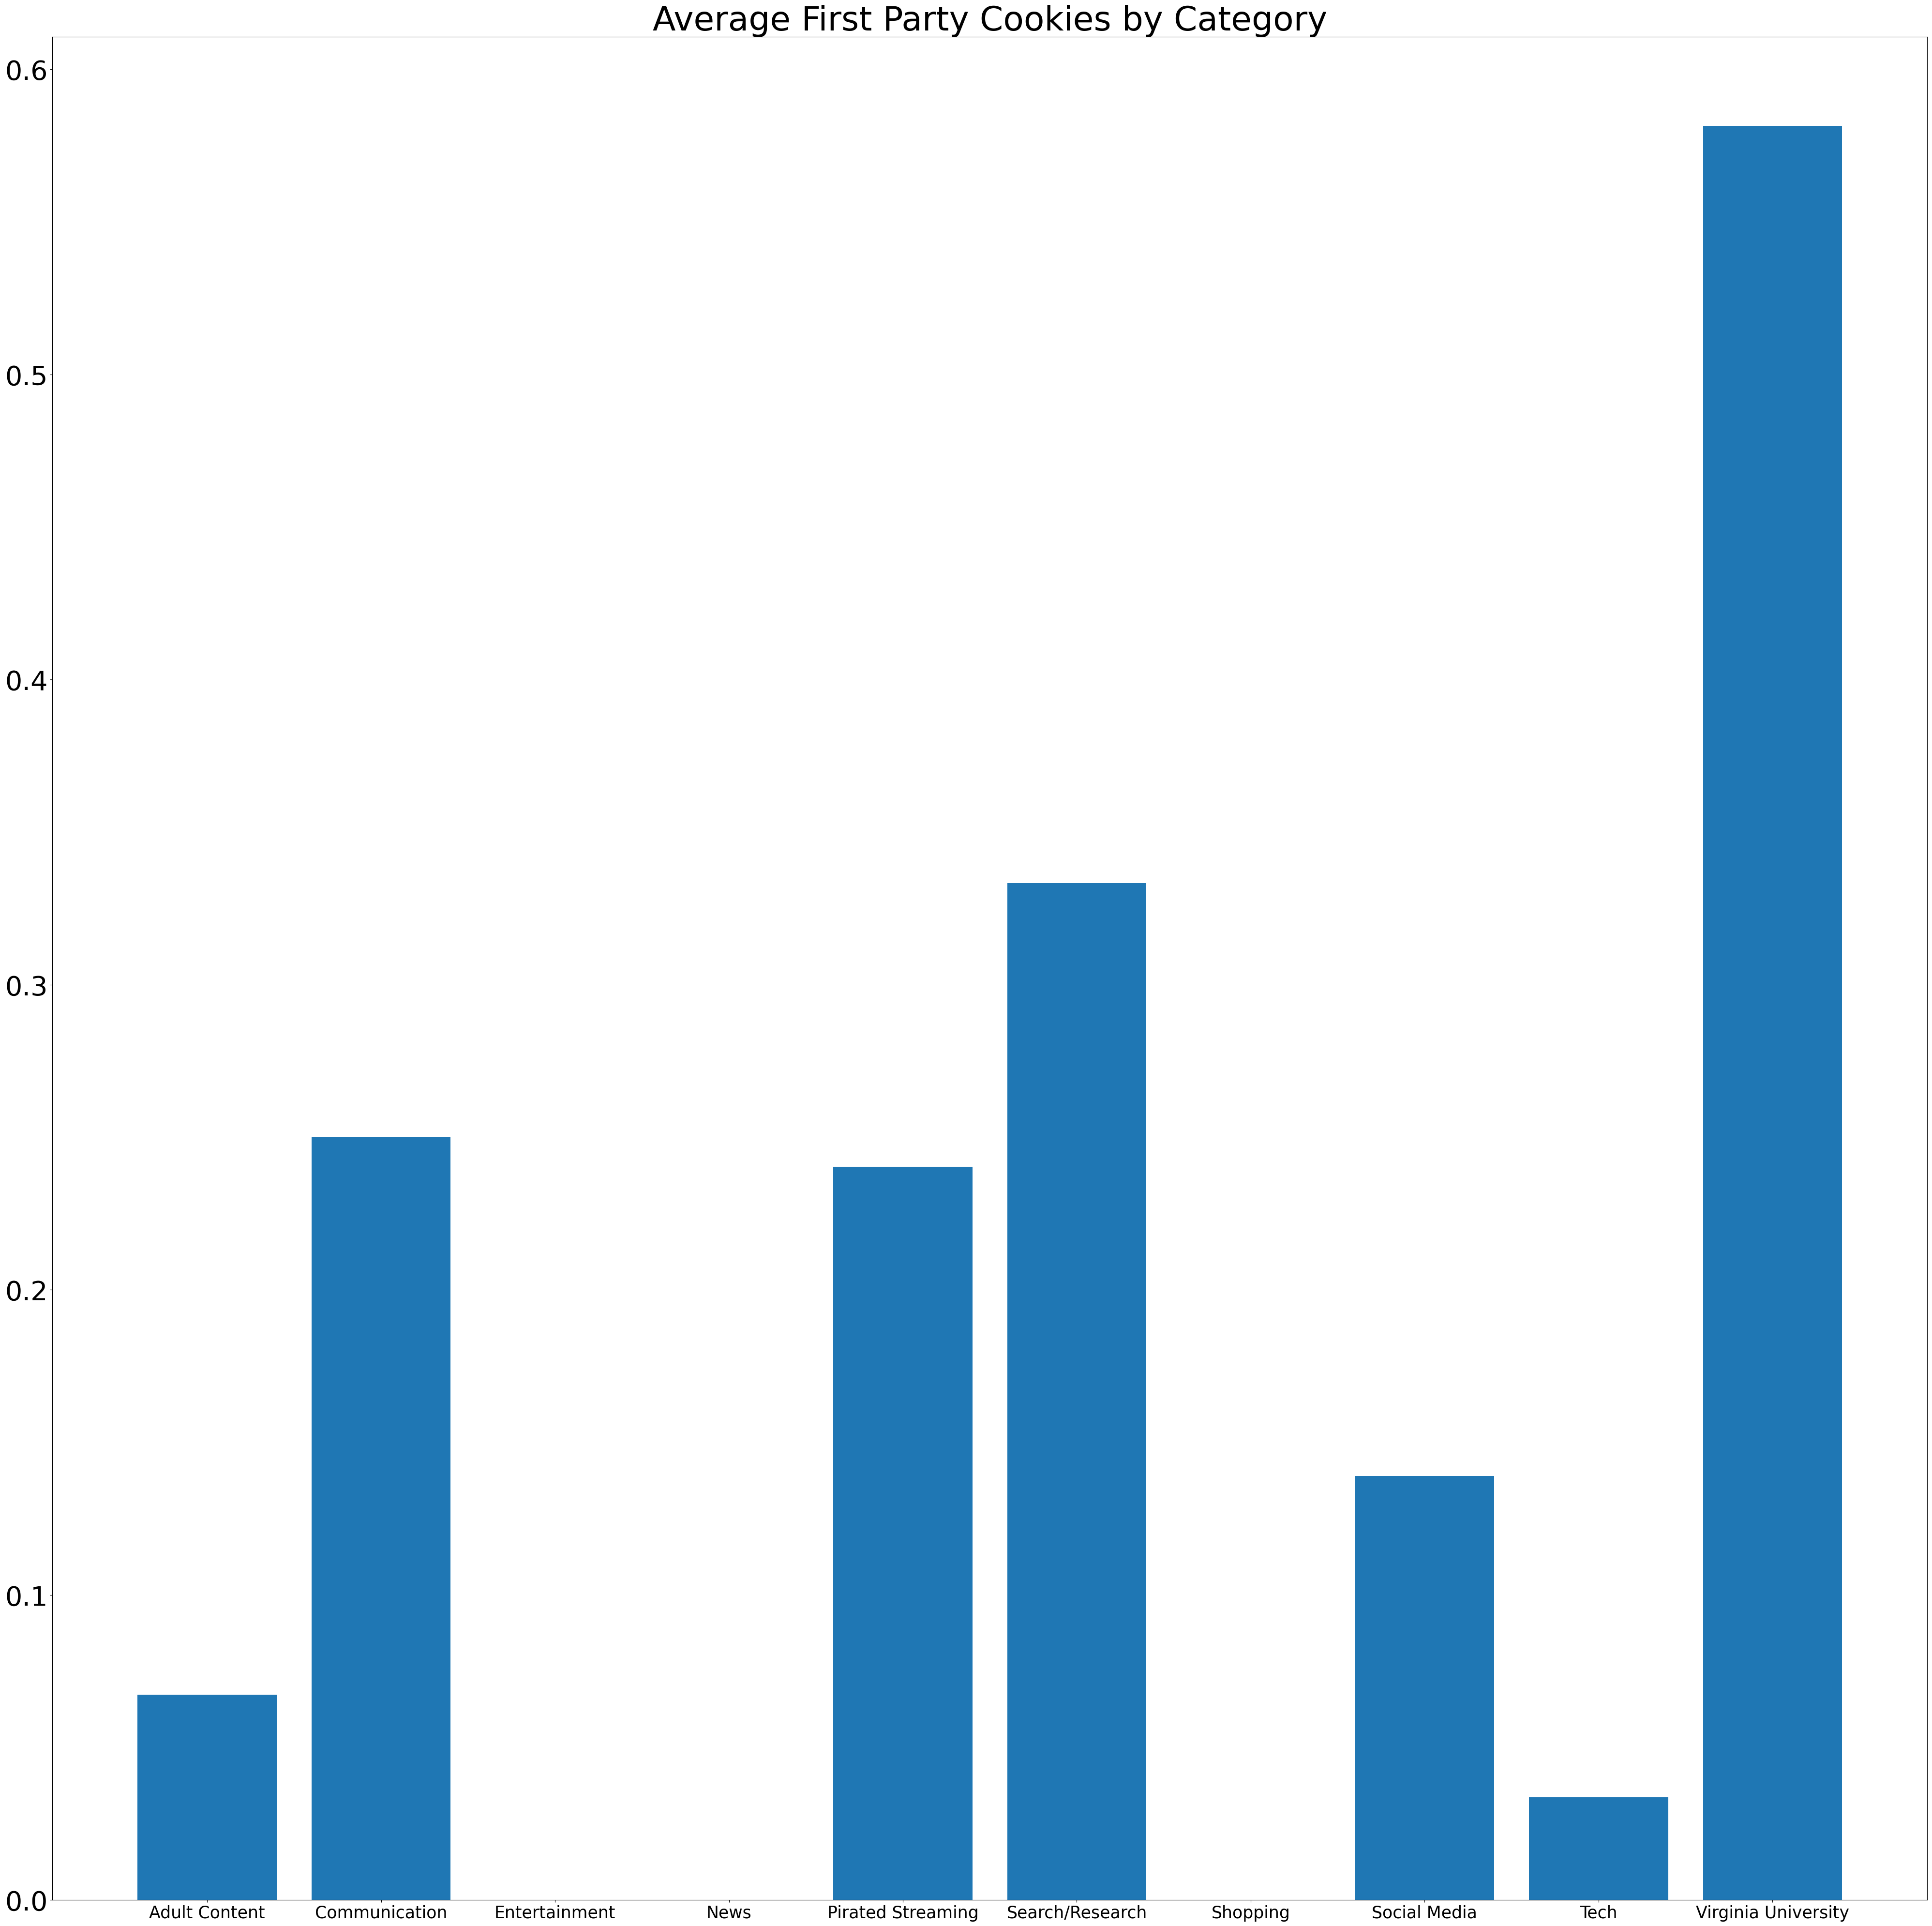

In [128]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['First Party Cookies'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average First Party Cookies by Category', fontsize = 50)

Text(0.5, 1.0, 'Average Third Party Cookies by Category')

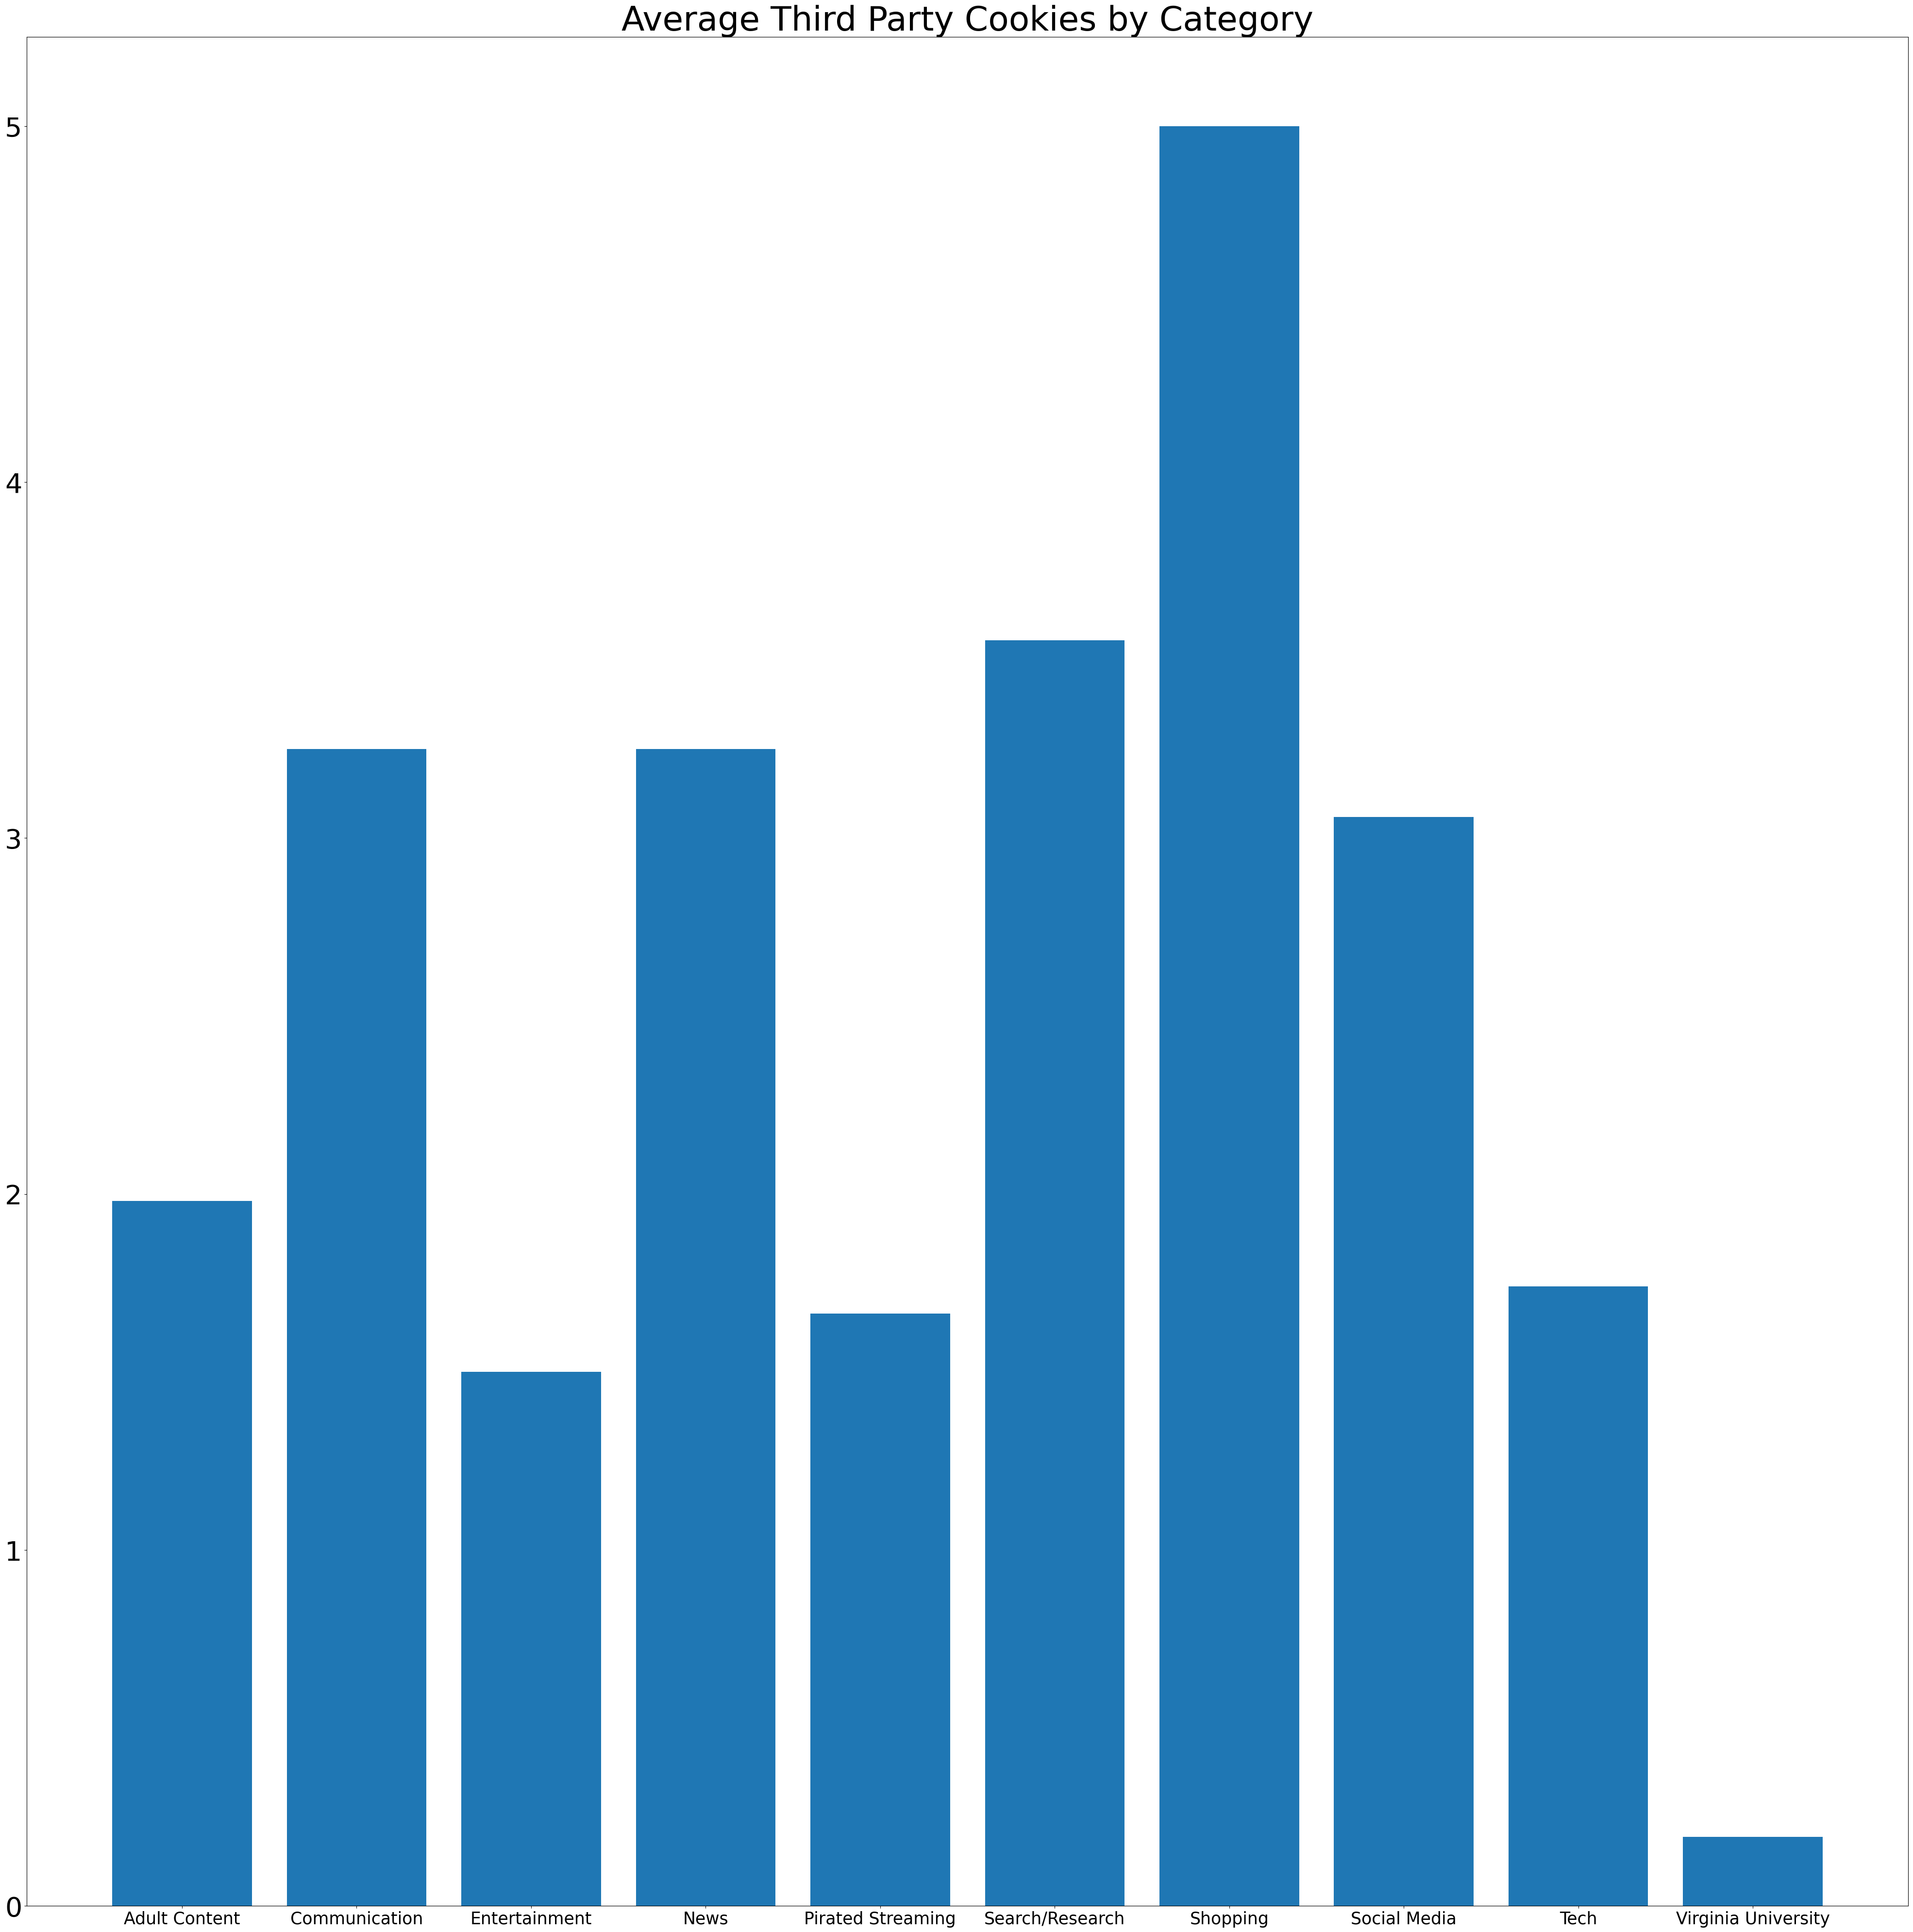

In [129]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Third Party Cookies'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Third Party Cookies by Category', fontsize = 50)

Text(0.5, 1.0, 'Average Tracking Pixels by Category')

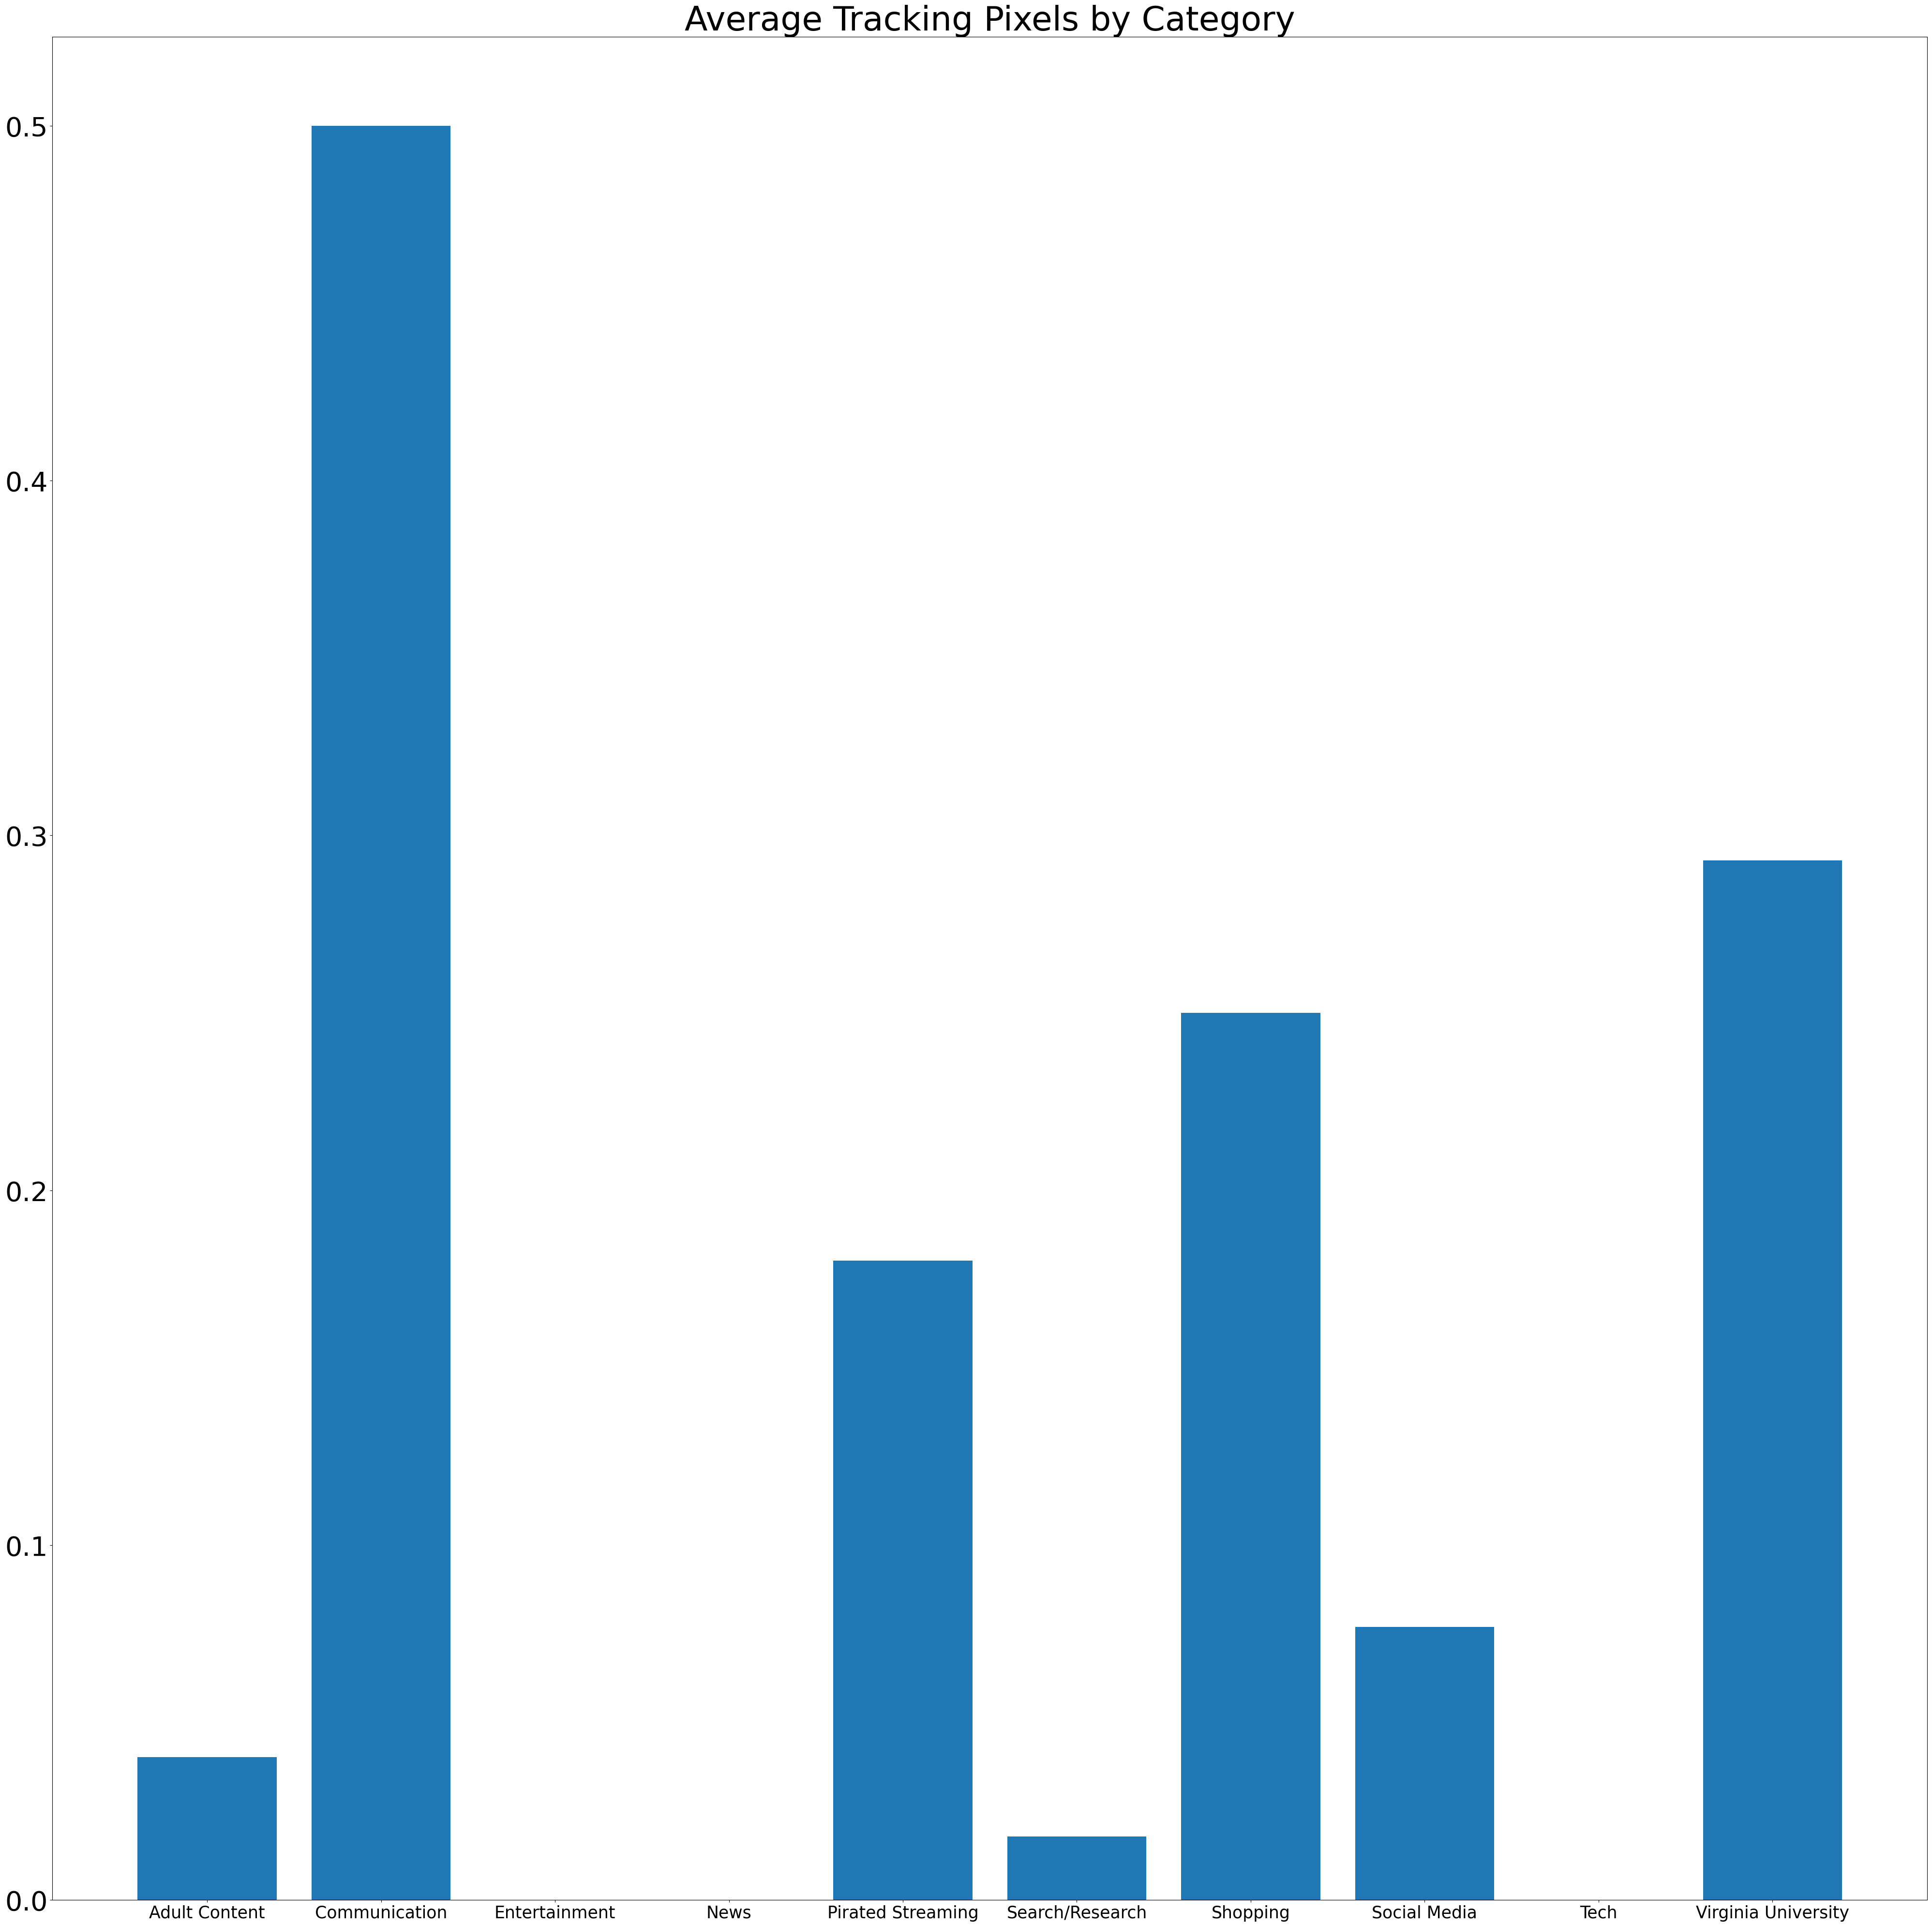

In [130]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Tracking Pixels'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Tracking Pixels by Category', fontsize = 50)

Text(0.5, 1.0, 'Average Ad Trackers by Category')

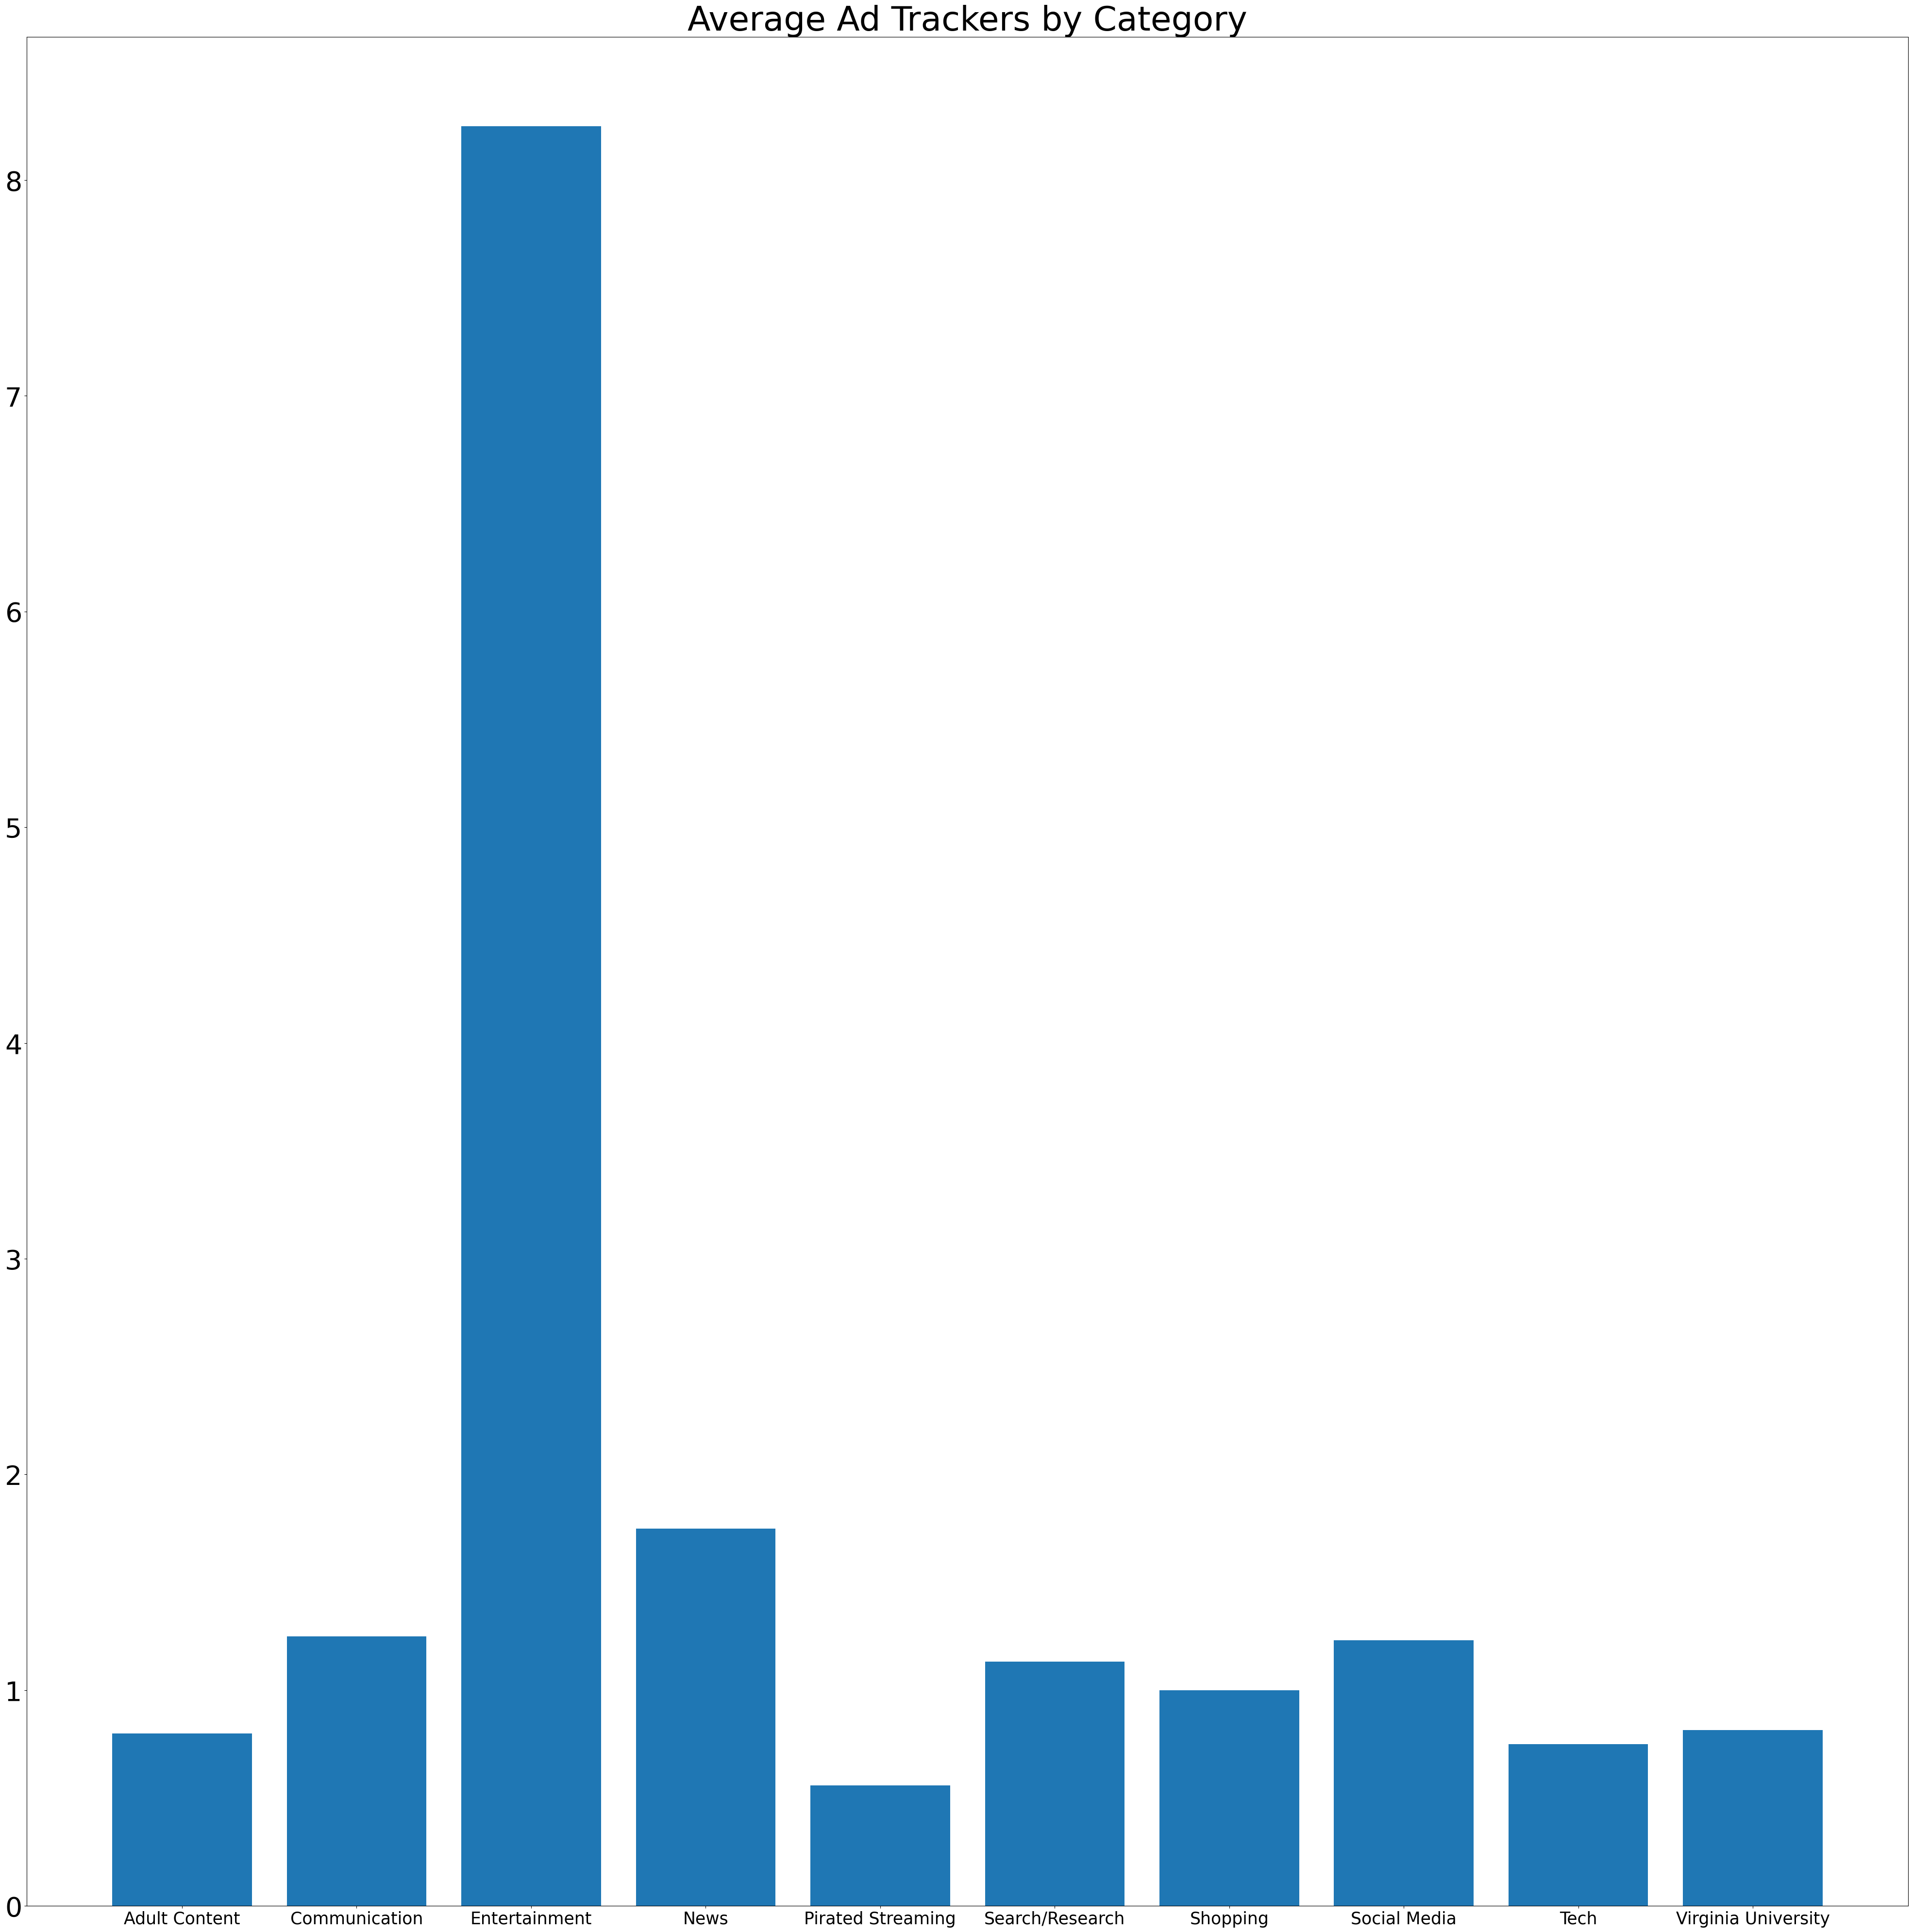

In [131]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Ad Trackers'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Ad Trackers by Category', fontsize = 50)

In [132]:
newdf.corr()

,Third Party Requests,Ad Counts,First Party Cookies,Third Party Cookies,Tracking Pixels,Ad Trackers
Third Party Requests,1.000000,0.026722,-0.013099,-0.038179,-0.012806,0.830048
Ad Counts,0.026722,1.000000,-0.144695,0.111124,-0.178893,0.112651
First Party Cookies,-0.013099,-0.144695,1.000000,-0.079884,0.071139,-0.058399
Third Party Cookies,-0.038179,0.111124,-0.079884,1.000000,-0.051957,0.000548
Tracking Pixels,-0.012806,-0.178893,0.071139,-0.051957,1.000000,-0.094543
Ad Trackers,0.830048,0.112651,-0.058399,0.000548,-0.094543,1.000000


Scoring in such a way that larger numbers are worse (each category is normalized to 0-1 scale then everything is added up)

In [133]:
scoreddf = newdf
scoreddf[['Ad Counts', 'Ad Trackers', 'First Party Cookies', 'Third Party Cookies', 'Third Party Requests', 'Tracking Pixels']] = (newdf[['Ad Counts', 'Ad Trackers', 'First Party Cookies', 'Third Party Cookies', 'Third Party Requests', 'Tracking Pixels']]-newdf[['Ad Counts', 'Ad Trackers', 'First Party Cookies', 'Third Party Cookies', 'Third Party Requests', 'Tracking Pixels']].min())/(newdf[['Ad Counts', 'Ad Trackers', 'First Party Cookies', 'Third Party Cookies', 'Third Party Requests', 'Tracking Pixels']].max() - newdf[['Ad Counts', 'Ad Trackers', 'First Party Cookies', 'Third Party Cookies', 'Third Party Requests', 'Tracking Pixels']].min())
scoreddf

,Domain Name,Category,Third Party Requests,Ad Counts,First Party Cookies,Third Party Cookies,Tracking Pixels,Ad Trackers
0,www.virginia.edu,Virginia University,0.316239,0.000000,0.000000,0.000000,0.500000,0.076923
1,www.cnu.edu,Virginia University,0.153846,0.000000,0.000000,0.000000,0.500000,0.038462
2,www.jmu.edu,Virginia University,0.068376,0.000000,0.000000,0.000000,0.000000,0.038462
3,www.longwood.edu,Virginia University,0.094017,0.000000,0.000000,0.000000,0.000000,0.000000
4,www.nsu.edu,Virginia University,0.179487,0.000000,0.800000,0.000000,0.000000,0.000000
5,www.odu.edu,Virginia University,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000
6,www.radford.edu,Virginia University,0.094017,0.000000,0.200000,0.000000,0.000000,0.115385
7,www.uvawise.edu,Virginia University,0.042735,0.000000,0.000000,0.000000,0.000000,0.000000
8,www.vcu.edu,Virginia University,0.085470,0.000000,0.000000,0.000000,0.000000,0.000000
9,www.vmi.edu,Virginia University,0.085470,0.000000,0.000000,0.000000,0.000000,0.038462


In [134]:
scoreddf['Score'] = scoreddf['Third Party Requests'] + scoreddf['Third Party Cookies'] + scoreddf['First Party Cookies'] + scoreddf['Ad Counts'] + scoreddf['Ad Trackers'] + scoreddf['Tracking Pixels']

In [135]:
scoreddf

,Domain Name,Category,Third Party Requests,Ad Counts,First Party Cookies,Third Party Cookies,Tracking Pixels,Ad Trackers,Score
0,www.virginia.edu,Virginia University,0.316239,0.000000,0.000000,0.000000,0.500000,0.076923,0.893162
1,www.cnu.edu,Virginia University,0.153846,0.000000,0.000000,0.000000,0.500000,0.038462,0.692308
2,www.jmu.edu,Virginia University,0.068376,0.000000,0.000000,0.000000,0.000000,0.038462,0.106838
3,www.longwood.edu,Virginia University,0.094017,0.000000,0.000000,0.000000,0.000000,0.000000,0.094017
4,www.nsu.edu,Virginia University,0.179487,0.000000,0.800000,0.000000,0.000000,0.000000,0.979487
5,www.odu.edu,Virginia University,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923
6,www.radford.edu,Virginia University,0.094017,0.000000,0.200000,0.000000,0.000000,0.115385,0.409402
7,www.uvawise.edu,Virginia University,0.042735,0.000000,0.000000,0.000000,0.000000,0.000000,0.042735
8,www.vcu.edu,Virginia University,0.085470,0.000000,0.000000,0.000000,0.000000,0.000000,0.085470
9,www.vmi.edu,Virginia University,0.085470,0.000000,0.000000,0.000000,0.000000,0.038462,0.123932


In [140]:
scoreddf.sort_values(by = ['Score'], ascending = False).reset_index().drop(columns = {'index','Third Party Requests','Ad Counts', 'First Party Cookies', 'Third Party Cookies', 'Tracking Pixels', 'Ad Trackers'})

,Domain Name,Category,Score
0,roblox.com,Entertainment,2.239789
1,mail.ru,Communication,1.662224
2,www.brightpoint.edu,Virginia University,1.606838
3,paypal.com,Shopping,1.522938
4,yandex.ru,Search/Research,1.398569
5,bing.com,Search/Research,1.385382
6,zoom.us,Communication,1.378119
7,globo.com,News,1.166667
8,tiktok.com,Social Media,1.136161
9,booking.com,Shopping,1.094963
